In [107]:
import cv2
import numpy as np
import pandas as pd
from PIL import Image

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [79]:
def rgb2str(rgb):
    return '#' + ''.join([hex(e).replace('x', '')[-2:] for e in rgb])
        

In [117]:
class MyImage(object):
    ''' Class of the Images with its Matrix in HSV ColorSpace '''
    
    def __init__(self, resolve=100):
        ''' Initialization with Resolve [resolve] '''
        # Init Resolve
        self.resolve = resolve
        pass
    
    def mk_h_circle(self):
        ''' Make Circle for H Dim'''
        hc = np.zeros((180, 3)).astype(np.uint8)
        hc[:, 0] = range(180)
        hc[:, 1:] = 255
        
        self.hc = hc
        
        # Make Image
        rgb = cv2.cvtColor(hc[:, np.newaxis, :], cv2.COLOR_HSV2BGR)
        rgb = rgb.squeeze()
        
        df = pd.DataFrame()
        df['rgb'] = [e for e in rgb]
        df['color'] = df['rgb'].map(rgb2str)
        df['idx'] = range(180)
        
        def ang2pos(a):
            t = a / 180 * np.pi * 2
            return (np.cos(t), np.sin(t))
        
        df['pos'] = df['idx'].map(ang2pos)
        
        df['x'] = df['pos'].map(lambda x: x[0])
        df['y'] = df['pos'].map(lambda x: x[1])
        
        fig = go.Figure(data=[go.Scatter(x=df['x'],
                                         y=df['y'],
                                         marker={'color': df['color']},
                                         mode='markers')])
        fig.update_layout(dict(title='Hue Ring'))
        
        return fig
        
    
    def mk_hsv(self, h=0):
        ''' Make HSV Matrix based on H Dim [h] '''
        # Get Resolve
        r = self.resolve
        
        # Init HSV Matrix
        hsv = np.zeros((r, r, 3)).astype(np.uint8)
        
        # Set H Dim
        hsv[:, :, 0] = h % 180
        
        # Set SV Dim
        hsv[:, :, 1:] = np.array(np.meshgrid(np.linspace(0, 255, resolve), np.linspace(0, 255, resolve))).transpose((1, 2, 0))
        
        self.hsv = hsv
        return hsv
    
    def plot_hsv(self, hsv=None):
        ''' Plot HSV Matrix '''
        if hsv is None:
            if hasattr(self, 'hsv'):
                hsv = self.hsv
            else:
                hsv = self.mk_hsv()
        
        # Make Image
        im = Image.fromarray(cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR))
        
        # Plot SV Matrix
        fig = px.imshow(im)
        fig.update_xaxes(title_text='S')
        fig.update_yaxes(title_text='V')
        return fig
        
mi = MyImage()

(180, 3)



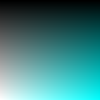
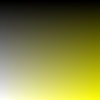
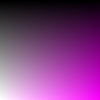

In [118]:
fig = make_subplots(rows=2, cols=2, subplot_titles=['Hue Ring', 'SV Matrix H 30', 'SV Matrix H 90', 'SV Matrix H 150'])

fig1 = mi.mk_h_circle()

fig.add_trace(
    fig1.data[0],
    row=1,
    col=1,
)

hsv = mi.mk_hsv(30)
fig2 = mi.plot_hsv(hsv)
fig.add_trace(
    fig2.data[0],
    row=1,
    col=2,
)

hsv = mi.mk_hsv(90)
fig3 = mi.plot_hsv(hsv)
fig.add_trace(
    fig3.data[0],
    row=2,
    col=1,
)

hsv = mi.mk_hsv(150)
fig4 = mi.plot_hsv(hsv)
fig.add_trace(
    fig4.data[0],
    row=2,
    col=2,
)

fig.update_layout(dict(
        height=800,
        width=800,
    ))

fig